# Human Activity Recognition

---

We will Classify the type of activity a person is performing based on measurements collected from a smartphone. The activities include:  

- Walking
- Walking_Upstairs
- Walking_Downstairs
- Sitting
- Standing
- Laying

-----

Using the dataset [_Human Activity Recognition Using Smartphones Data Set_](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones) from the UC Irvine Machine Learning Repositiory.  

Dataset description (as provided in the original authors):

```
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain. See 'features_info.txt' for more details. 

For each record it is provided:

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 
- An identifier of the subject who carried out the experiment.
```

[Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/) 


# Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from collections import Counter

# Read the Data

In [2]:
FEATURE_NAMES = 'features.txt'
TRAIN_DATA = 'X_train.txt'
TRAIN_LABELS = 'y_train.txt'

In [9]:
# feature names
df_feats = pd.read_table(FEATURE_NAMES, sep='\n', header=None)

# training data
df_train = pd.read_table(TRAIN_DATA, sep='\s+', header=None)

# training labels
df_train_labels = pd.read_table(TRAIN_LABELS, sep='\n', header=None, names=["label"], squeeze = True)

# Data Exploring

We want to have an idea of potential problems with data. In order to have a good model one has to look for Null or impossible values, and correlated features. With these done we can see if any features will not be useful in models becuase of null values and see if any model assumptions are violated by correlated features (such as in linear / logistic regression)

In [6]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [7]:
df_train.shape

(7352, 561)

In [10]:
df_feats.head()

,0
0,1 tBodyAcc-mean()-X
1,2 tBodyAcc-mean()-Y
2,3 tBodyAcc-mean()-Z
3,4 tBodyAcc-std()-X
4,5 tBodyAcc-std()-Y


We will give the name of the features to the columns of our training dataset 

In [11]:
df_train.columns = df_feats.iloc[:,0]
df_train.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


and check if there is any null values in our dataframe

In [12]:
df_train.isnull().values.any()

False

Correlation plot of the first 20 features

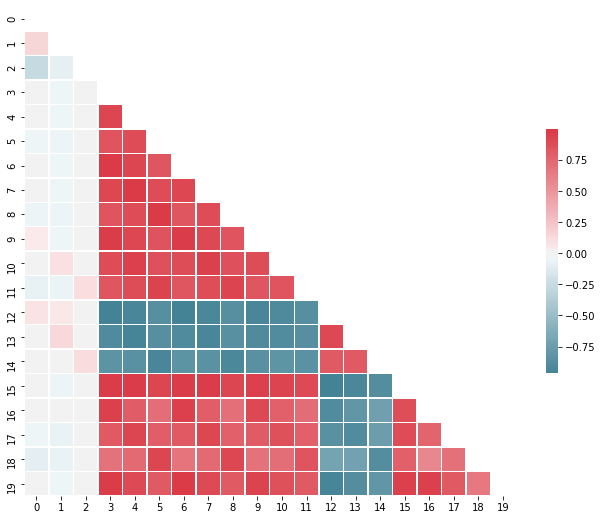

In [13]:
first_twenty = har_train.iloc[:, :20] # pull out first 20 feats
corr = first_twenty.corr()  # compute correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)  # make mask
mask[np.triu_indices_from(mask)] = True  # mask the upper triangle

fig, ax = plt.subplots(figsize=(11, 9))  # create a figure and a subplot
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # custom color map
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    linewidth=0.5,
    cbar_kws={'shrink': 0.5}
);

In [15]:
df_train_labels.count()

7352

# Preprocess the Data

---

Comparing statistics within each activity

In [16]:
y = df_train_labels 
X = df_train

data = pd.concat([X, y], axis=1)
data.shape 

(7352, 562)

In [19]:
# group by the 'label' and show descriptive stats
data.groupby('label').agg(['count', 'mean','std','min','max','median']).T.head(20)

label                                 1            2           3            4  \
1 tBodyAcc-mean()-X count   1226.000000  1073.000000  986.000000  1286.000000   
                    mean       0.276260     0.261930    0.288169     0.273449   
                    std        0.050353     0.078029    0.095101     0.041998   
                    min        0.121465    -0.061041   -0.161088    -0.412659   
                    max        0.433256     0.480180    0.617597     0.559135   
                    median     0.274582     0.266666    0.284955     0.277306   
2 tBodyAcc-mean()-Y count   1226.000000  1073.000000  986.000000  1286.000000   
                    mean      -0.017768    -0.026647   -0.016370    -0.012143   
                    std        0.020880     0.037038    0.027057     0.032421   
                    min       -0.127407    -0.183885   -0.094826    -0.121073   
                    max        0.071488     0.100904    0.099755     0.324130   
                    median    -0.017867    -0.023000   -0.017714    -0.016457   
3 tBodyAcc-mean()-Z count   1226.000000  1073.000000  986.000000  1286.000000   
                    mean      -0.108884    -0.120424   -0.105860    -0.106581   
                    std        0.032436     0.060204    0.050656     0.045323   
                    min       -0.285675    -0.403290   -0.289816    -0.560934   
                    max        0.006195     0.142537    0.091229     0.280939   
                    median    -0.110424    -0.113635   -0.109039    -0.108125   
4 tBodyAcc-std()-X  count   1226.000000  1073.000000  986.000000  1286.000000   
                    mean      -0.312641    -0.221072    0.139847    -0.983450   

label                                 5            6  
1 tBodyAcc-mean()-X count   1374.000000  1407.000000  
                    mean       0.279294     0.269191  
                    std        0.020097     0.101541  
                    min        0.111231    -1.000000  
                    max        0.631510     1.000000  
                    median     0.277507     0.276946  
2 tBodyAcc-mean()-Y count   1374.000000  1407.000000  
                    mean      -0.016123    -0.018345  
                    std        0.017846     0.073512  
                    min       -0.116007    -1.000000  
                    max        0.212768     1.000000  
                    median    -0.017097    -0.017364  
3 tBodyAcc-mean()-Z count   1374.000000  1407.000000  
                    mean      -0.107330    -0.107169  
                    std        0.035680     0.089743  
                    min       -0.509645    -1.000000  
                    max        0.267377     1.000000  
                    median    -0.108771    -0.108104  
4 tBodyAcc-std()-X  count   1374.000000  1407.000000  
                    mean      -0.985346    -0.959475

# Train/Test Data

With a feel for the data, now we will aside a "test" data-set that will allow us to evaluate out models.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=24)

# Handmade KNN

We will code from scratch the K-Nearest Neighbors algorithm with following the idea:
given a value (with our movement-data, this "value" is better thought of as a vector of values) to be classified, KNN calculates the distance between that value and all other values in the training data-set. Then, the "`k`" nearest neighbors are polled as to their "label", and the given value is predicted to be of that majority value.

In [26]:
def all_distances(test_point, data_set):
    
    # Take difference
    diff = test_point - data_set
    
    # Calculate distance
    dists = np.apply_along_axis(np.linalg.norm, 1, diff )
    
    # Sort distances values
    dists = np.sort(dists)
    
    return dists

In [25]:
def labels_of_smallest(numeric, labels, n):
    
    # Create a df of the two arrays (to simplify sorting)
    con = np.concatenate((numeric.reshape(-1,1), labels.reshape(-1,1)), axis = 1)
    df = pd.DataFrame(con, columns = ["num","lab"])
    
    # Sort
    df = df.sort_values(by = 'num')
    
    # Return the top "n" values (labels associated to points with smallest distance to input)
    return df['lab'].head(n).values

The following function will find the majority vote label given an arbitrary set of labels

In [27]:
def label_voting(labels):
    
    # Recast labels as list
    labels = list(labels)
    
    # Count the appereance of each label in the input. Returns a dictionary
    c = Counter(labels).most_common()
    
    # If the list of labels has only one label
    if len(c) == 1:
        return c[0][0]
    
    # If there is a label with majority vote. Returns that label
    if c[0][1] > c[1][1]:
        return c[0][0]
    
    # For a tie. Return the one that appears first at the list
    else:
        top_votes = c[0][1]
        #print(top_votes)
        poss = []
        for t in c:
            if t[1] == top_votes:
                poss.append(t[0])
        idx = dict()
        # print(poss)
        for p in poss:
            idx[labels.index(p)] = p
        #print(idx)
        return labels[sorted(idx.keys())[0]]

Another possible function for the majority vote

In [28]:
def alt(labels):
    
    # Empty Dictionary
    count = {}
    
    # Length of labels
    total = len(labels)
    
    # Go through labels, add entry to dictionary for each with:
    # count and first occurrence
    for i, l in enumerate(labels):
        if l in count:
            count[l]['count'] +=1
        else:
            count[l] = {'count':1, 'first':total -i}
            
    # Create DataFrame from dict, sort, and return top result
    df = pd.DataFrame.from_dict(count).T
    df = df.sort_values(by = ['count','first'], ascending = False)
    
    # Return the label of the first value at the dict
    # (the first value is the one with majority vote)
    return df.index[0]

With the functions above which are encharged of calculating the distances from the input to other points, sort them and get the majority vote label we can code finally the function which is going to join all of this and predict the label for a point, given the training data and a specified number n of neighbors

In [29]:
def custom_KNN( point, X_train, y_train, n):
  
    # Helper Function for vote counting
    def countVotes(l):
        
        c = Counter(l).most_common()
        
        # List of labels of a single element
        if len(c) == 1:
            return c[0][0]
        
        # Case of majority vote
        if c[0][1] > c[1][1]:
            return c[0][0]
        
        # Case of a tie. Returns the first that appears in the list 
        else:
            top_votes = c[0][1]
            #print(top_votes)
            poss = []
            for t in c:
                if t[1] == top_votes:
                    poss.append(t[0])
            idx = dict()
            # print(poss)
            for p in poss:
                idx[l.index(p)] = p
            #print(idx)
            return l[sorted(idx.keys())[0]]
        
    # Take difference
    diff = point - X_train
    
    # Find distance
    dists = np.apply_along_axis(np.linalg.norm, 1, diff )
    
    # Create df of distances, re-index to original data
    df = pd.DataFrame(dists)
    df.index = X_train.index
    
    # Add labels, column names.
    df = pd.concat([df, y_train], axis = 1)
    df.columns = ["dist","label"]
    
    # Take top votes, and count
    votes = list(df.sort_values("dist").head(n)['label'])
    
    return countVotes(votes)

# Trying the Handmade Model

Create new train-test partitions

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=24)

K: Number of neighbors 
N: Number of predictions to be made from the test set
G: Size of groups to be classied

In [54]:
def custom_KNN_predictions(X_train, X_test, y_train, K, N, G):
    
    # Number of predictions to be made
    print("Total 'test' observations:", len(X_test))
    
    # Number of neighbors
    print("Number of neighbors:", K)
    
    # Number of predictions to be made
    print("Number of predictions to be mde from the test set:", N)
    
    # Frequently the number of predictions is large
    # to avoid the prediction taking too long
    # classify by groups 
    print("Classifying every point in X_test would take too long - classify by groups of", G)
    
    # Create list of predictions
    custom_preds = []
    
    # Process (number) of predictions
    print("Number of predictions done:")
    
    # Predict each point
    for i, idx in enumerate(X_test.index[:N+1]):
        if i % G == 0: print(i)
        pred = custom_KNN(X_test.loc[idx,:], X_train, y_train, K)
        custom_preds.append(pred)

    # Predictions
    print("\nHome-Built predictions")
    
    # Return all the predictions
    return(custom_preds)

In [55]:
custom_KNN_predictions(X_train, X_test, y_train, 5, 1000, 200)

Total 'test' observations: 2206
Number of neighbors: 5
Number of predictions to be mde from the test set: 1000
Classifying every point in X_test would take too long - classify by groups of 200
0
200
400
600
800
1000


[6,
 1,
 4,
 3,
 1,
 4,
 4,
 5,
 6,
 3,
 1,
 3,
 2,
 1,
 3,
 4,
 5,
 6,
 1,
 1,
 1,
 2,
 3,
 6,
 4,
 2,
 6,
 2,
 3,
 5,
 5,
 5,
 1,
 3,
 2,
 4,
 2,
 1,
 5,
 6,
 1,
 5,
 4,
 5,
 6,
 4,
 5,
 2,
 2,
 1,
 3,
 5,
 2,
 6,
 2,
 6,
 6,
 1,
 1,
 6,
 5,
 4,
 5,
 5,
 6,
 5,
 4,
 5,
 4,
 2,
 2,
 4,
 5,
 4,
 5,
 1,
 4,
 2,
 1,
 5,
 2,
 4,
 3,
 6,
 2,
 3,
 5,
 1,
 6,
 2,
 6,
 6,
 4,
 3,
 1,
 1,
 1,
 5,
 1,
 4,
 4,
 5,
 2,
 2,
 1,
 6,
 1,
 2,
 3,
 6,
 4,
 1,
 1,
 6,
 2,
 2,
 1,
 6,
 6,
 6,
 2,
 3,
 1,
 1,
 3,
 4,
 6,
 5,
 2,
 6,
 6,
 4,
 6,
 6,
 3,
 6,
 1,
 1,
 2,
 4,
 1,
 1,
 1,
 4,
 1,
 2,
 6,
 1,
 5,
 2,
 3,
 2,
 6,
 4,
 6,
 1,
 3,
 4,
 1,
 3,
 5,
 5,
 2,
 3,
 5,
 1,
 4,
 1,
 2,
 2,
 6,
 1,
 2,
 1,
 5,
 1,
 6,
 5,
 1,
 6,
 6,
 4,
 6,
 6,
 5,
 2,
 2,
 5,
 2,
 3,
 3,
 5,
 4,
 5,
 6,
 1,
 6,
 1,
 5,
 6,
 6,
 4,
 2,
 2,
 3,
 5,
 5,
 2,
 2,
 2,
 2,
 5,
 5,
 1,
 5,
 5,
 4,
 2,
 6,
 6,
 6,
 5,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 3,
 5,
 2,
 5,
 5,
 5,
 4,
 3,
 3,
 2,
 3,
 5,
 6,
 2,
 5,
 3,
 3,
 1,
 1,
 4,


# Sklearn KNN

Using the `sklearn` implementation [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) 

It will run much faster than our home-built version.  

In [59]:
%%time

def sklearn_KNN(X_train, X_test, y_train, K, N):

    # Instantiate classifier
    # The default distance is Euclidean
    knn = KNeighborsClassifier(n_neighbors = K)

    # Fit model with training data
    knn.fit(X_train, y_train)

    # Create predictions for first 200 test observations
    skpreds = knn.predict(X_test[:N])

    print("sklearn prediction performance")
    return(classification_report(y_test[:N], skpreds))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


In [60]:
sklearn_KNN(X_train, X_test, y_train, 5, 200)

sklearn prediction performance


array([6, 1, 4, 3, 1, 4, 4, 5, 6, 3, 1, 3, 2, 1, 3, 4, 5, 6, 1, 1, 1, 2,
       3, 6, 4, 2, 6, 2, 3, 5, 5, 5, 1, 3, 2, 4, 2, 1, 5, 6, 1, 5, 4, 5,
       6, 4, 5, 2, 2, 1, 3, 5, 2, 6, 2, 6, 6, 1, 1, 6, 5, 4, 5, 5, 6, 5,
       4, 5, 4, 2, 2, 4, 5, 4, 5, 1, 4, 2, 1, 5, 2, 4, 3, 6, 2, 3, 5, 1,
       6, 2, 6, 6, 4, 3, 1, 1, 1, 5, 1, 4, 4, 5, 2, 2, 1, 6, 1, 2, 3, 6,
       4, 1, 1, 6, 2, 2, 1, 6, 6, 6, 2, 3, 1, 1, 3, 4, 6, 5, 2, 6, 6, 4,
       6, 6, 3, 6, 1, 1, 2, 4, 1, 1, 1, 4, 1, 2, 6, 1, 5, 2, 3, 2, 6, 4,
       6, 1, 3, 4, 1, 3, 5, 5, 2, 3, 5, 1, 4, 1, 2, 2, 6, 1, 2, 1, 5, 1,
       6, 5, 1, 6, 6, 4, 6, 6, 5, 2, 2, 5, 2, 3, 3, 5, 4, 5, 6, 1, 6, 1,
       5, 6])

# Comparing Home-Built with Sklearn predictions

In [63]:
def comparing_predictions(y_test, custom_preds, N):

    print("\nHome-Built prediction performance")
    print(classification_report(y_test[:N+1], custom_preds))


    # Compare predictions: "differences" should == 0!

    differences = 0
    for cust, sk in zip(custom_preds, skpreds):
        if cust != sk:
            differences +=1
    return("Total Differences:", differences)

In [64]:
comparing_predictions(y_test, custom_preds, 200)


Home-Built prediction performance
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       0.97      1.00      0.99        33
           3       1.00      0.95      0.98        22
           4       0.82      0.92      0.87        25
           5       0.94      0.86      0.90        36
           6       1.00      1.00      1.00        41

    accuracy                           0.96       201
   macro avg       0.96      0.96      0.95       201
weighted avg       0.96      0.96      0.96       201



('Total Differences:', 0)